In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load all required libraries

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [4]:
# parameters setup
imgs_path = "/content/drive/MyDrive/shoes_data/"
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 5 # number of most similar images to retrieve

In [5]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')
# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input,
outputs=vgg_model.get_layer("fc2").output)
# print the layers of the CNN
feat_extractor.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [6]:
files = []
for x in os.listdir(imgs_path):
    if 'jpg' in x:
        # print(x)
        files.append(f"{imgs_path}/{x}")
        # break

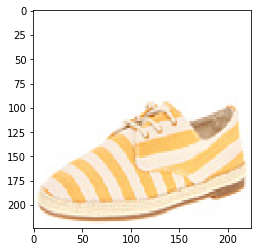

image loaded successfully!


In [7]:
# load an image in PIL format
original = load_img(files[0],target_size=(224,224))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [8]:
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [9]:
# load all the images and prepare them for feeding into the CNN
importedImages = []
for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    importedImages.append(image_batch)
images = np.vstack(importedImages)
processed_imgs = preprocess_input(images.copy())

In [10]:
imgs_features = feat_extractor.predict(processed_imgs)
print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(3742, 4096)

In [15]:
# compute cosine similarities between images
cosSimilarities = cosine_similarity(imgs_features)
# store the results into a pandas dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities,
columns=files, index=files)
cos_similarities_df.head()

,/content/drive/MyDrive/shoes_data//8108524.2954.jpg,/content/drive/MyDrive/shoes_data//8108501.401317.jpg,/content/drive/MyDrive/shoes_data//8108503.10414.jpg,/content/drive/MyDrive/shoes_data//8108524.3.jpg,/content/drive/MyDrive/shoes_data//7858387.1567.jpg,/content/drive/MyDrive/shoes_data//7937898.6.jpg,/content/drive/MyDrive/shoes_data//7858350.7.jpg,/content/drive/MyDrive/shoes_data//7937861.3.jpg,/content/drive/MyDrive/shoes_data//8062596.2428.jpg,/content/drive/MyDrive/shoes_data//7937904.3.jpg,/content/drive/MyDrive/shoes_data//8108501.552.jpg,/content/drive/MyDrive/shoes_data//7858390.18.jpg,/content/drive/MyDrive/shoes_data//7858350.3.jpg,/content/drive/MyDrive/shoes_data//8135636.284232.jpg,/content/drive/MyDrive/shoes_data//7937801.3.jpg,/content/drive/MyDrive/shoes_data//7937904.859.jpg,/content/drive/MyDrive/shoes_data//8108524.27877.jpg,/content/drive/MyDrive/shoes_data//7937801.7046.jpg,/content/drive/MyDrive/shoes_data//8108524.401321.jpg,/content/drive/MyDrive/shoes_data//7937825.3.jpg,/content/drive/MyDrive/shoes_data//7858387.261.jpg,/content/drive/MyDrive/shoes_data//113587.19117.jpg,/content/drive/MyDrive/shoes_data//8033941.7046.jpg,/content/drive/MyDrive/shoes_data//7853053.7.jpg,/content/drive/MyDrive/shoes_data//7608203.3.jpg,/content/drive/MyDrive/shoes_data//8033577.3.jpg,/content/drive/MyDrive/shoes_data//7937908.184651.jpg,/content/drive/MyDrive/shoes_data//8033947.7046.jpg,/content/drive/MyDrive/shoes_data//8033969.184651.jpg,/content/drive/MyDrive/shoes_data//7999405.3.jpg,/content/drive/MyDrive/shoes_data//8033918.7046.jpg,/content/drive/MyDrive/shoes_data//8033636.401.jpg,/content/drive/MyDrive/shoes_data//113587.4082.jpg,/content/drive/MyDrive/shoes_data//8033973.7.jpg,/content/drive/MyDrive/shoes_data//8033971.401.jpg,/content/drive/MyDrive/shoes_data//7999402.580.jpg,/content/drive/MyDrive/shoes_data//7937906.7046.jpg,/content/drive/MyDrive/shoes_data//7937906.3.jpg,/content/drive/MyDrive/shoes_data//8042044.632.jpg,/content/drive/MyDrive/shoes_data//113587.84.jpg,...,/content/drive/MyDrive/shoes_data//7202308.42560.jpg,/content/drive/MyDrive/shoes_data//7543784.3.jpg,/content/drive/MyDrive/shoes_data//7801941.9.jpg,/content/drive/MyDrive/shoes_data//7967350.616.jpg,/content/drive/MyDrive/shoes_data//7967336.184651.jpg,/content/drive/MyDrive/shoes_data//7967350.3.jpg,/content/drive/MyDrive/shoes_data//7967336.3.jpg,/content/drive/MyDrive/shoes_data//7801940.18.jpg,/content/drive/MyDrive/shoes_data//7967350.714.jpg,/content/drive/MyDrive/shoes_data//7794311.20.jpg,/content/drive/MyDrive/shoes_data//7801929.139.jpg,/content/drive/MyDrive/shoes_data//7543784.4045.jpg,/content/drive/MyDrive/shoes_data//7801939.354.jpg,/content/drive/MyDrive/shoes_data//7967350.9551.jpg,/content/drive/MyDrive/shoes_data//7543784.184651.jpg,/content/drive/MyDrive/shoes_data//7967336.325.jpg,/content/drive/MyDrive/shoes_data//8041296.6.jpg,/content/drive/MyDrive/shoes_data//7801939.3.jpg,/content/drive/MyDrive/shoes_data//7801937.2042.jpg,/content/drive/MyDrive/shoes_data//7543784.351571.jpg,/content/drive/MyDrive/shoes_data//7801941.401.jpg,/content/drive/MyDrive/shoes_data//7801937.3.jpg,/content/drive/MyDrive/shoes_data//7967336.189.jpg,/content/drive/MyDrive/shoes_data//7677006.89.jpg,/content/drive/MyDrive/shoes_data//7802053.202026.jpg,/content/drive/MyDrive/shoes_data//8016565.18.jpg,/content/drive/MyDrive/shoes_data//7841744.346.jpg,/content/drive/MyDrive/shoes_data//7842700.3.jpg,/content/drive/MyDrive/shoes_data//7842700.18.jpg,/content/drive/MyDrive/shoes_data//7802053.275.jpg,/content/drive/MyDrive/shoes_data//8016565.11421.jpg,/content/drive/MyDrive/shoes_data//7802052.401.jpg,/content/drive/MyDrive/shoes_data//8016568.3.jpg,/content/drive/MyDrive/shoes_data//7801942.59630.jpg,/content/drive/MyDrive/shoes_data//7801953.20.jpg,/content/drive/MyDrive/shoes_data//7841754.18.jpg,/content/drive/MyDrive/shoes_data//7802052.354.jpg,/content/drive/MyDrive/shoes_data//7802053.3.jpg,/content/drive/MyDrive/sho

In [16]:
#saving all the file in csv format
cos_similarities_df.to_csv("cosine_similarity_for_shoes.csv")